In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
dfx=pd.read_csv('./data/Training Data/Linear_X_Train.csv') #DataFrame for X
dfy=pd.read_csv('./data/Training Data/Linear_Y_Train.csv') #DataFrame for Y
dfx=dfx.values #converts to numpy array. Better way is to use .to_numpy()
dfy=dfy.values
#print(dfx.shape,dfy.shape)
#print(dfx)
x=dfx.reshape((-1,)) #reshaping to 1D array
y=dfy.reshape((-1,))
print(x.shape,y.shape)
#print(x)
#print(y)

(3750,) (3750,)


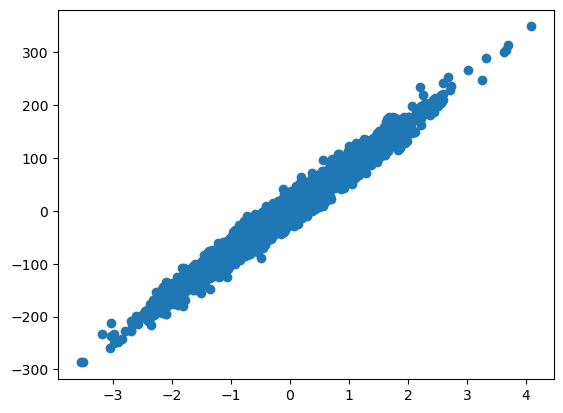

In [59]:
plt.scatter(x,y)
plt.show()


## Gradient Desecent Algorithm

In [60]:
def hypothesis(x,theta):
    return theta[0]+theta[1]*x

In [61]:
def error(x,y,theta):
    error=0
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],theta)
        error+=(hx-y[i])**2
    return error

In [62]:
def gradient(x,y,theta):
    grad=np.zeros((2,))
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],theta)
        grad[0]+=(hx-y[i])
        grad[1]+=(hx-y[i])*x[i]
    return grad

In [63]:
def gradientDescent(x,y,learning_rate=0.0001):
    theta=np.array([-2.0,0.0]) #random theta
    max_itr=100
    itr=0
    err_list=[]
    theta_list=[]
    while(itr<=max_itr):
        grad=gradient(x,y,theta)
        err=error(x,y,theta)
        err_list.append(err)
        theta_list.append(theta)
        theta[0]-=learning_rate*grad[0]
        theta[1]-=learning_rate*grad[1]
        itr+=1
    return theta,err_list,theta_list

In [64]:
final_theta,err_list,theta_list=gradientDescent(x,y)

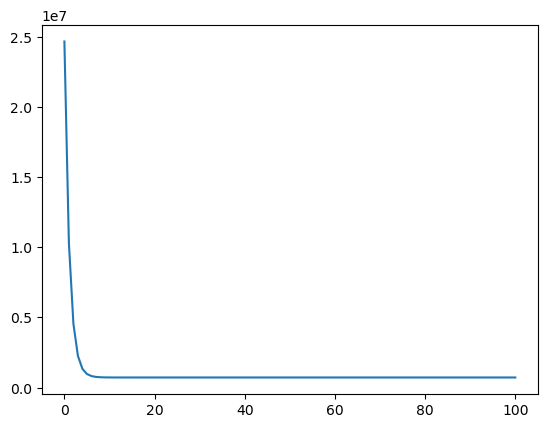

In [65]:
plt.plot(err_list)

In [66]:
print(final_theta)

[ 3.72798828 80.54363185]


In [67]:
xtest=pd.read_csv('./data/Testing Data/Linear_X_Test.csv')
xtest=xtest.values
xtest=xtest.reshape((-1,))
print(xtest)

[-1.87794441 -0.86903192 -2.53018242 ...  0.12800782 -0.27803759
 -0.68042543]


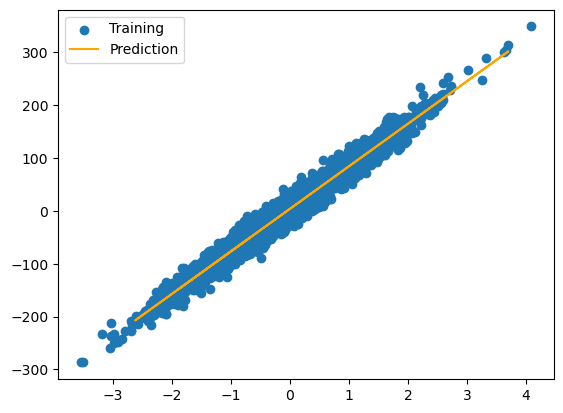

In [70]:
plt.scatter(x,y,label='Training')
plt.plot(xtest,hypothesis(xtest,final_theta),color='orange',label='Prediction')
plt.legend()

# Linear Regression using scikit-learn

In [71]:
X=pd.read_csv('./data/Training Data/Linear_X_Train.csv') #DataFrame for X
Y=pd.read_csv('./data/Training Data/Linear_Y_Train.csv') #DataFrame for Y
X=X.values #converts to numpy array. Better way is to use .to_numpy()
Y=Y.values
#print(X.shape,Y.shape)
#print(X)
X=X.reshape((-1,1)) #reshaping to 2D array (1 column ,rows depending on size) since sklearn LinearRegression X,Y needs to be in 2D array format
Y=Y.reshape((-1,1))
print(X.shape,Y.shape)
#print(X)
#print(Y)

(3750, 1) (3750, 1)


In [76]:
from sklearn.linear_model import LinearRegression #scikit-learn is the name of the library (used for installation) and sklearn is how you acces it in Python (name of the module)

In [77]:
model=LinearRegression()

In [78]:
model.fit(X,Y)

LinearRegression()

In [88]:
XTest=xtest.reshape((-1,1))
output=model.predict(XTest)

In [89]:
bias=model.intercept_
coeff=model.coef_
print(bias)
print(coeff)

[3.72798828]
[[80.54363185]]


In [90]:
model.score(X,Y)

0.9709612233822353

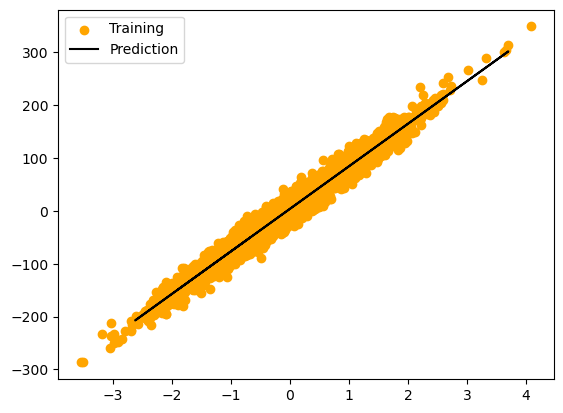

In [91]:
plt.scatter(X,Y,color='orange',label='Training')
plt.plot(XTest,output,color='black',label='Prediction')
plt.legend()
plt.show()

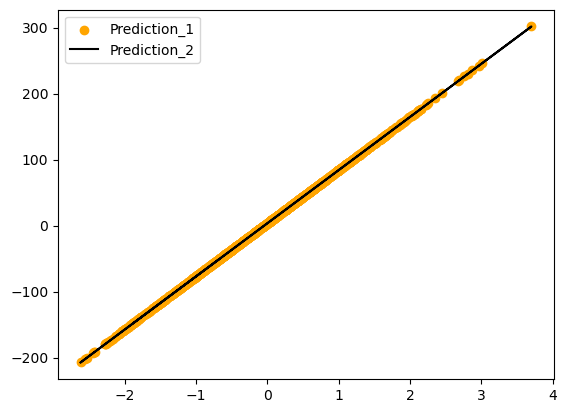

In [96]:
plt.scatter(xtest,hypothesis(xtest,final_theta),color='orange',label='Prediction_1')
plt.plot(XTest,output,color='black',label='Prediction_2')
plt.legend()
plt.show()